In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
from transformers import image_transforms

from PIL import Image

orginal_image = Image.open('/content/drive/MyDrive/IMG_0711.JPG')

In [5]:
import numpy as np
import matplotlib.pyplot as plt

image_array = np.array(orginal_image)

In [6]:
image_array

array([[[180, 189, 198],
        [181, 190, 199],
        [181, 190, 199],
        ...,
        [224, 216, 179],
        [225, 215, 179],
        [225, 215, 179]],

       [[180, 189, 198],
        [181, 190, 199],
        [182, 191, 200],
        ...,
        [224, 216, 179],
        [225, 215, 179],
        [224, 214, 178]],

       [[180, 189, 198],
        [183, 192, 201],
        [185, 194, 203],
        ...,
        [225, 217, 180],
        [225, 215, 179],
        [224, 214, 178]],

       ...,

       [[187, 187, 187],
        [188, 188, 188],
        [187, 187, 187],
        ...,
        [119, 123, 122],
        [121, 123, 122],
        [120, 122, 121]],

       [[187, 187, 187],
        [188, 188, 188],
        [188, 188, 188],
        ...,
        [120, 124, 123],
        [119, 123, 122],
        [117, 121, 120]],

       [[186, 186, 186],
        [187, 187, 187],
        [187, 187, 187],
        ...,
        [121, 126, 122],
        [120, 125, 121],
        [120, 125, 121]]

**Preprocessing**

In [7]:
cropped_image = image_transforms \
    .center_crop(
        image = image_array,
        size = (1000,1000)
)


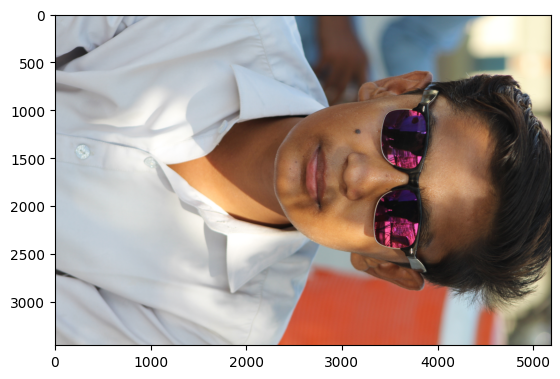

In [8]:
plt.imshow(orginal_image)

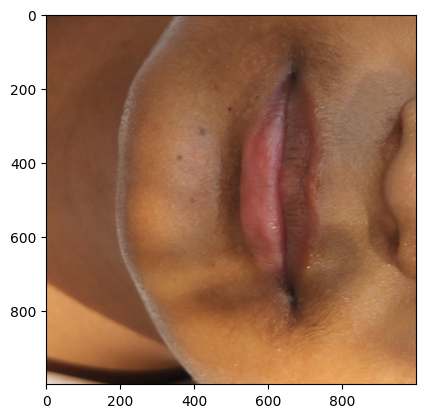

In [9]:
import matplotlib.pyplot as plt
plt.imshow(cropped_image)

**Image Classification**


*   The process of assigning labels to an image
*   Example: Stock Photograhy
*   Use Cases: Crops ete.






In [10]:
from transformers import pipeline

classifier = pipeline(
    task = 'image-classification',
    model = 'google/vit-base-patch16-224'
)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [11]:
elephant_image = Image.open('/content/drive/MyDrive/images.jpeg')

In [12]:
classifier(elephant_image)

[{'label': 'African elephant, Loxodonta africana',
  'score': 0.7349870800971985},
 {'label': 'tusker', 'score': 0.2400341033935547},
 {'label': 'Indian elephant, Elephas maximus', 'score': 0.023338912054896355},
 {'label': 'zebra', 'score': 0.0001614281936781481},
 {'label': 'warthog', 'score': 6.843753362772986e-05}]

In [13]:
results = classifier(elephant_image, top_k = 2)

In [14]:
print(results[0]['label'])

African elephant, Loxodonta africana


In [15]:
results[0]['score']

0.7349870800971985

In [16]:
fashion = Image.open('/content/drive/MyDrive/image_data/images (1).jpeg')

In [17]:
fashion_classifier = pipeline(
    task = 'image-classification',
    model = 'abhishek/autotrain_fashion_mnist_vit_base'
)

In [18]:
results = fashion_classifier(fashion)

In [19]:
results[0]['label']

'Trouser'

**Question answering and multi-modal tasks**



*   Document question and answering
*   Visual question and answering



**Visual question and answering**

In [20]:
vqa = pipeline(
    task = 'visual-question-answering',
    model = 'dandelin/vilt-b32-finetuned-vqa'
)

In [21]:
result = vqa(
    image = orginal_image,
    question = "what's the color of person's clothes"
)

In [22]:
result

[{'score': 0.9969911575317383, 'answer': 'white'},
 {'score': 0.0185483917593956, 'answer': 'pink'},
 {'score': 0.0031517911702394485, 'answer': 'blue'},
 {'score': 0.0021809351164847612, 'answer': 'gray'},
 {'score': 0.002127466257661581, 'answer': 'beige'}]

**Audio Classification**

In [24]:
# from datasets import Audio

# songs = songs.cast_columns('audio', Audio(sampling_rate = 16_000))

In [26]:
# import librosa

# durations = []

# for row in songs['path']:
#   durations.append(librosa.get_duration(path=row))

# songs.add_column('duration', durations)

# songs = dataset.filter(
#     lambda d: d ,10.0, input_columns = ['duration']
# )

In [27]:
classifier = pipeline(
    task = 'audio-classification',
    model = 'superb/wav2vec2-base-superb-ks'
)

config.json:   0%|          | 0.00/2.42k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/configuration_utils.py:364: UserWarning: Passing `gradient_checkpointing` to a config initialization is deprecated and will be removed in v5 Transformers. Using `model.gradient_checkpointing_enable()` instead, or if you are using the `Trainer` API, pass `gradient_checkpointing=True` in your `TrainingArguments`.
  warnings.warn(


pytorch_model.bin:   0%|          | 0.00/378M [00:00<?, ?B/s]

Some weights of the model checkpoint at superb/wav2vec2-base-superb-ks were not used when initializing Wav2Vec2ForSequenceClassification: ['wav2vec2.encoder.pos_conv_embed.conv.weight_g', 'wav2vec2.encoder.pos_conv_embed.conv.weight_v']
- This IS expected if you are initializing Wav2Vec2ForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing Wav2Vec2ForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of Wav2Vec2ForSequenceClassification were not initialized from the model checkpoint at superb/wav2vec2-base-superb-ks and are newly initialized: ['wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'wav2vec2.encoder.pos_conv_em

preprocessor_config.json:   0%|          | 0.00/215 [00:00<?, ?B/s]

**Automatic Speech Recognitin**

In [32]:
!pip install evaluate
!pip install jiwer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 15.0 MB/s eta 0:00:00


In [34]:
from evaluate import load

wer = load('wer')

reference = 'I love Sindh and want to live in hyderabad'

predictions = 'I love Sindh and wanted too leave in hyderabad'

In [37]:
wer_score = wer.compute(
    predictions = [predictions],
    references = [reference]
)


In [38]:
wer_score

0.3333333333333333